In [ ]:
#Import librries
import numpy as np
from random import random
from sklearn.model_selection import train_test_split

In [ ]:
def generate_dataset(num_samples, test_size):

  x = np.array([[random()/2 for _ in range(2)]for  _ in range(num_samples)])
  y = np.array([[i[0] + i[1]] for i in x])

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
  return x_train, x_test, y_train, y_test

In [ ]:
if __name__ == "__main__":
    x_train, x_test, y_train, y_test = generate_dataset(10, 0.2)
    print("x_test: \n {}".format(x_test))
    print("y_test: \n {}".format(y_test))

x_test: 
 [[0.15236987 0.2879385 ]
 [0.18036665 0.13306861]]
y_test: 
 [[0.44030838]
 [0.31343526]]


In [ ]:
# Build Model
# Working With Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile Model

In [ ]:
optimiser = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimiser, loss="MSE")

In [ ]:
#Train Model

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0681
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0671
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0662
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0612
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0597
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0590
Epoch 13/100
1/1 [==============================] - 0s 2ms/st

In [ ]:
#Evaluate Model

In [ ]:
print("\nModel evaluation:")
model.evaluate(x_test, y_test, verbose=1)


Model evaluation:
1/1 [==============================] - 0s 1ms/step - loss: 0.0061


0.006148631684482098

In [ ]:
#Make predictions

In [ ]:
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)

In [ ]:
print("\nSome predictions:")
for d, p in zip(data, predictions):
    print ("{} + {} = {}".format(d[0], d[1], p[0]))


Some predictions:
0.1 + 0.2 = 0.4155093729496002
0.2 + 0.2 = 0.4156133532524109


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Download and prepare the CIFAR10 dataset
#The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

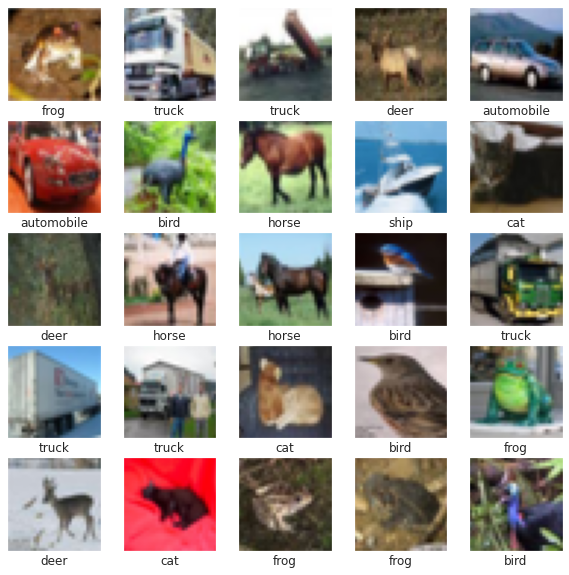

In [ ]:
#Verify the data
#To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#Let's display the architecture of our model so far.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5219 - accuracy: 0.4453 - val_loss: 1.2289 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1692 - accuracy: 0.5852 - val_loss: 1.1026 - val_accuracy: 0.6077
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0266 - accuracy: 0.6392 - val_loss: 1.0129 - val_accuracy: 0.6483
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9268 - accuracy: 0.6749 - val_loss: 0.9581 - val_accuracy: 0.6644
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8483 - accuracy: 0.7014 - val_loss: 0.9076 - val_accuracy: 0.6828
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7895 - accuracy: 0.7211 - val_loss: 0.9247 - val_accuracy: 0.6830
Epoch 7/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.7370 - accuracy: 0.7392 - val_loss: 0.9353 -

313/313 - 4s - loss: 0.8988 - accuracy: 0.7067


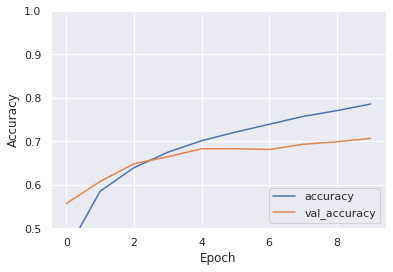

In [ ]:
#Evaluate the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)


0.7067000269889832
